In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.DataFrame(
    {
        "x" : [3,4,5,6,7],
        "y" : [2.5, 3.2, 3.8, 6.5, 11.5]
    }
)

df
x = df['x']
y = df["y"]
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

n = len(x)
print(f"Number of rows in the dataframe : {n}")

Number of rows in the dataframe : 5


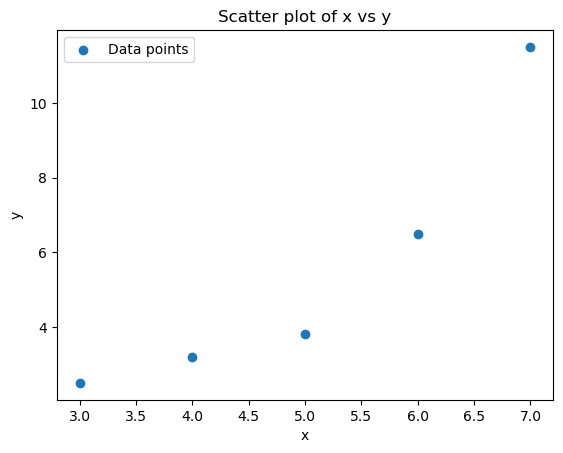

In [48]:
# PLOTING X VS Y TO SEE RELATION
plt.scatter(x,y,label="Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of x vs y")
plt.legend()
plt.show()

Root mean squared for linear regression : 1.327478813390255


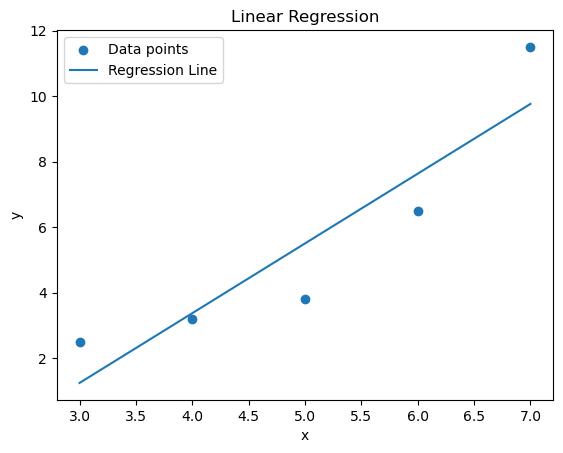

In [49]:
# FITING LINEAR MODEL FOR ABOVE DATAPOINTS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x,y)
linear_pred = model.predict(x)

RMSE_linear = mean_squared_error(y_true = y, y_pred = linear_pred, squared = False)
print(f"Root mean squared for linear regression : {RMSE_linear}")

plt.scatter(x,y,label="Data points")
plt.plot(x, linear_pred, label="Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

RMSE for polynomial regression of degree 2 is : 0.3558490851872058
RMSE for polynomial regression of degree 3 is : 0.1069044967649708
RMSE for polynomial regression of degree 4 is : 1.0188269356568966e-11


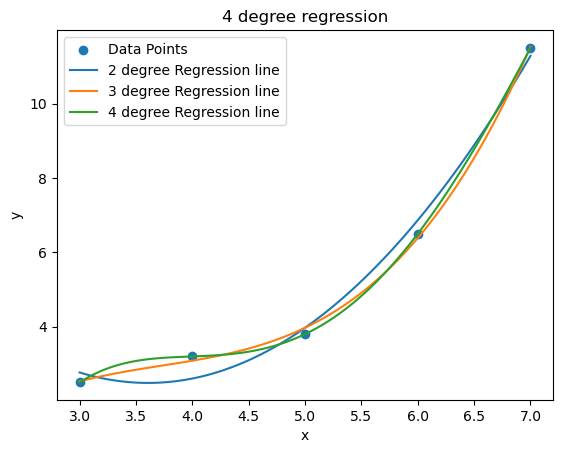

In [51]:
# FITTING POLYNOMIAL REGRESSION FOR THE ABOVE DATAPOINTS AND TRYING TO FIND THE DEGREE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.scatter(x,y, label="Data Points") 

degrees = [2,3,4]

x_range = np.linspace(x.min(),x.max(),100).reshape(-1,1)

for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    poly_model = make_pipeline(poly_features, LinearRegression())
    poly_model.fit(x, y)
    poly_pred = poly_model.predict(x)
    poly_pred_plot = poly_model.predict(x_range)

    RMSE_poly = mean_squared_error(y_true = y, y_pred = poly_pred, squared = False)
    print(f"RMSE for polynomial regression of degree {degree} is : {RMSE_poly}")
    plt.plot(x_range, poly_pred, label=f"{degree} degree Regression line")
      
plt.title(f"{degree} degree regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



In [68]:
# BUILDING A POLYNOMIAL REGRESSION MODEL USING MATRIX FORULATION METHOD
x_matrix = np.array([[n, np.sum(x), np.sum(x**2)], [np.sum(x), np.sum(x**2), np.sum(x**3)], [np.sum(x**2), np.sum(x**3), np.sum(x**4)]])
print(x_matrix)
y_matrix = np.array([[np.sum(y)],[np.sum(x*y)],[np.sum((x**2)*y)]])
print(y_matrix)

results = np.linalg.inv(x_matrix) @ y_matrix
B0 = results[0][0]
B1 = results[1][0]
B2 = results[2][0]
print(f"The intercept B0 : {B0}")
print(f"Linear coefficient B1 : {B1}")
print(f"Quadratic coefficient B2: {B2}")

[[   5   25  135]
 [  25  135  775]
 [ 135  775 4659]]
[[ 27.5]
 [158.8]
 [966.2]]
The intercept B0 : 12.428571428572583
Linear coefficient B1 : -5.512857142857476
Quadratic coefficient B2: 0.7642857142857631


In [71]:
# MAKING PREIDCTION AND EVALUTING THE MODEL
y_pred = B0 + B1*x + B2*(x**2)
df['y_pred'] = y_pred

RMSE = mean_squared_error(y,y_pred, squared = False)
print(f"ROOT MEAN SQUARED ERROR : {RMSE}")

ROOT MEAN SQUARED ERROR : 0.3558490851872063
